In [3]:
# Cell 1 – Imports & paths
import pandas as pd
from pathlib import Path
import sys; sys.path.append("../src")
from cohort_utils import build_retention_matrix, feature_retention_lift
from viz_helpers   import heatmap_retention
DATA = Path("telco_clean_cohorts.csv")
df = pd.read_csv(DATA)

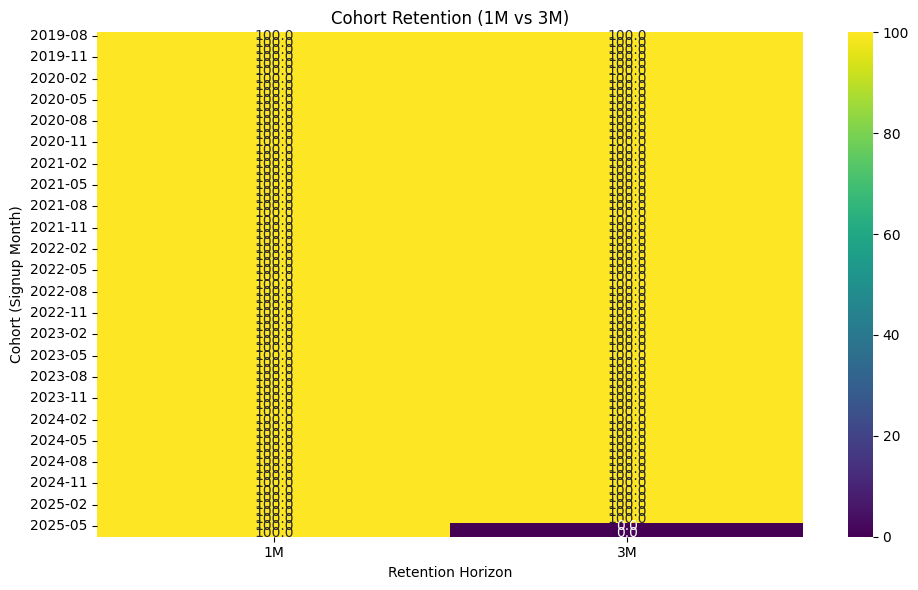

,1M,3M
CohortMonth,,
2019-08,100.0,100.0
2019-09,100.0,100.0
2019-10,100.0,100.0
2019-11,100.0,100.0
2019-12,100.0,100.0
...,...,...
2025-02,100.0,100.0
2025-03,100.0,100.0
2025-04,100.0,100.0


In [4]:
# Cell 2 – Cohort retention matrix
ret_mat = build_retention_matrix(df, horizons=(1, 3))
heatmap_retention(ret_mat, "Cohort Retention (1M vs 3M)")
ret_mat

In [5]:
# Cell 3 – Feature lift
for feat in ["Feature_A", "Feature_B", "Feature_C"]:
    print(f"\n{feat} 3‑Month Retention:")
    print(feature_retention_lift(df, feat, horizon=3))


Feature_A 3‑Month Retention:
With       96.8
Without    83.6
dtype: float64

Feature_B 3‑Month Retention:
With       95.4
Without    81.7
dtype: float64

Feature_C 3‑Month Retention:
With       97.5
Without    83.1
dtype: float64


In [6]:
# Cell 4 – Export retention matrix for Power BI
ret_mat.reset_index().to_csv("retention_matrix.csv", index=False)